Денис Иванов

###  Домашнее задание

### Марковские случайные процессы

In [46]:
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from hmmlearn.hmm import GaussianHMM

%matplotlib inline
sns.set()

from warnings import filterwarnings 
filterwarnings('ignore')

### Задание 1

Скачайте текст "Война и мир". Очистите его, оставив только русские буквы и символы пробела. Постройте матрицу переходных вероятностей. Посчитайте вероятность встретить строку из 4-х символов, которая начинается п, а кончается на р; Используя матрицу переходных вероятностей сгенерируйте слово, начинающееся с буквы “Б” и имеющее длину 8-мь символов

Скачиваем текст, удаляем лишние символы и объединяем 4 тома в один список всех русских слов (не уникальных), встречающихся в тексте.

В случае, если в тексте встречался перенос слова (я таких случаев не нашел, но могло быть) то мой алгоритм воспринимал перенесеннойе слово, как 2 отдельных слова.


In [47]:
with open('tom_1.txt', 'r', encoding='utf-8') as f1:
    text1 = f1.read().lower()
    text1 = re.findall('[а-яё]+', text1)

with open('tom_2.txt', 'r', encoding='utf-8') as f2:
    text2 = f2.read().lower()
    text2 = re.findall('[а-яё]+', text2)

with open('tom_3.txt', 'r', encoding='utf-8') as f3:
    text3 = f3.read().lower()
    text3 = re.findall('[а-яё]+', text3)

with open('tom_4.txt', 'r', encoding='utf-8') as f4:
    text4 = f4.read().lower()
    text4 = re.findall('[а-яё]+', text4)
    
text = text1 + text2 + text3 + text4

len(text1), len(text2), len(text3), len(text4), len(text),

(104383, 116923, 121872, 104745, 447923)

In [48]:
text[1011:1020]

['императрице', 'и', 'в', 'то', 'же', 'время', 'утешить', 'его', 'кстати']

Матрица переходных вероятностей

In [49]:
russian = 'абвгдеёжзийклмнопрстуфхцчшщъыьэюя'
POS = {l: i for i, l in enumerate(russian)}

probabilities = np.zeros((len(russian), len(russian)))

for i in text:
    for cp, cn in zip(i[:-1], i[1:]):
        probabilities[POS[cp], POS[cn]] += 1

In [50]:
probabilities = (probabilities / probabilities.sum(axis=1)[:, None])

df = pd.DataFrame(probabilities, index=(c for c in russian), columns=(c for c in russian))
df.iloc[:5,:5]

,а,б,в,г,д
а,0.000105,0.011372,0.061551,0.015600,0.035680
б,0.066333,0.000610,0.005466,0.000661,0.001500
в,0.166365,0.000405,0.001001,0.001058,0.009214
г,0.058129,0.000000,0.002305,0.000070,0.065695
д,0.172561,0.001289,0.038688,0.000267,0.001082


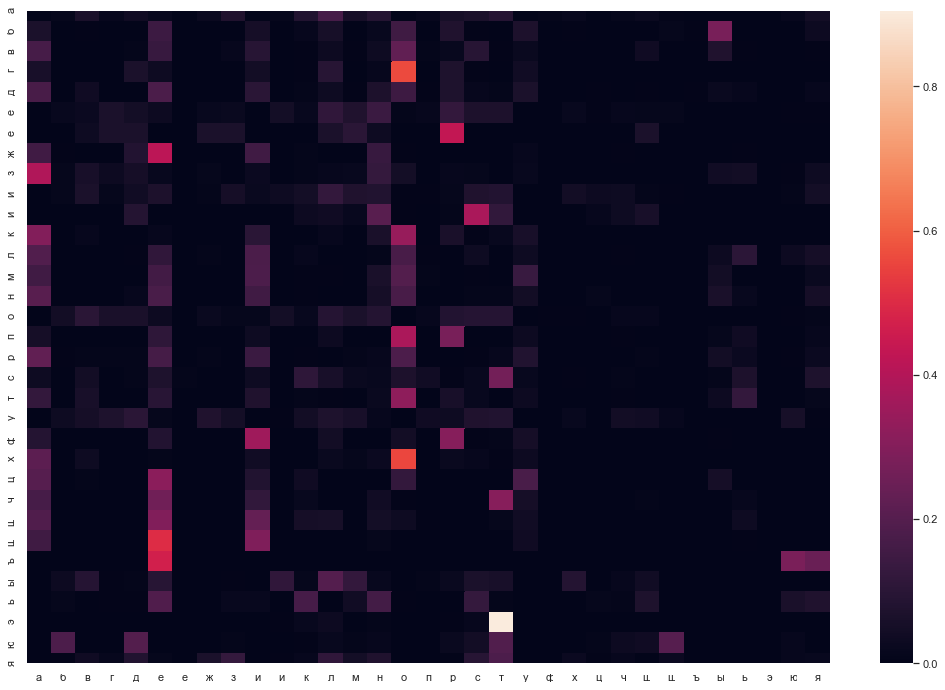

In [51]:
plt.figure(figsize=(18,12))
sns.heatmap(df)
plt.show()

Посчитайте вероятность встретить (В ТЕКСТЕ) строку из 4-х символов, которая начинается "П", а кончается на "Р";

In [52]:
from collections import Counter

z = 0
selected_words = []

for i in range (len(text)):
    if len (text[i]) == 4 and text[i][0] == 'п' and text[i][-1] == 'р':
        z +=1
        selected_words += [text[i]]
        
print ('Слова, удовлетворяющие условию задачи') 
print ('встречаются в тексте', z, 'раз с вероятностью', round(100* z / len (text),2), '%)')
for i in Counter(selected_words).most_common(5):
    print ('в том числе слово',  i[0], ' - ',i[1], 'раз  с вероятностью', round(100* i[1] / len (text),2), '%)')        

Слова, удовлетворяющие условию задачи
встречаются в тексте 1426 раз с вероятностью 0.32 %)
в том числе слово пьер  -  1401 раз  с вероятностью 0.31 %)
в том числе слово петр  -  25 раз  с вероятностью 0.01 %)


Посчитайте вероятность встретить (ВООБЩЕ) строку из 4-х символов, которая начинается "П", а кончается на "Р"

(ИСХОДЯ ТОЛЬКО ИЗ РАСЧЕТНОЙ МАТРИЦЫ ВЕРОЯТНОСТЕЙ)

In [53]:
df_1  = pd.DataFrame(columns= ['string', 'chance'])
i = 0
                               
for let_2 in russian:
    for let_3 in russian:
        string = ['п', let_2, let_3 ,'р']
        chance = 1 / 33
        for cp, cn in zip(string[1:], string[:-1]):
            chance *= df.iloc[POS[cp], POS[cn]]
        df_1.loc[i] = [''.join(string), chance]
        i +=1
        
df_1.sort_values(['chance'], ascending = False).head()

,string,chance
609,псор,0.000020
594,псар,0.000019
599,псер,0.000014
603,псир,0.000013
614,псур,0.000007


In [54]:
string = ['п', 'ф','р']

Используя матрицу переходных вероятностей сгенерируйте слово, начинающееся с буквы “Б” и имеющее длину 8-мь символов

In [55]:
# посмотрим, а какие слова встречались (В ТЕКСТЕ) из 8 букв, начинающиеся на Б

z = 0
selected_words = []

for i in range (len(text)):
    if len (text[i]) == 8 and text[i][0] == 'б':
        z +=1
        selected_words += [text[i]]
print ('Слова, удовлетворяющие условию задачи') 
print ('встречаются в тексте', z, 'раз с вероятностью', round(100* z / len (text),2), '%)')
for i in Counter(selected_words).most_common(5):
    print ('в том числе слово',  i[0], ' - ',i[1], 'раз  с вероятностью', round(100* i[1] / len (text),2), '%)')   

Слова, удовлетворяющие условию задачи
встречаются в тексте 1013 раз с вероятностью 0.23 %)
в том числе слово балашева  -  44 раз  с вероятностью 0.01 %)
в том числе слово бенигсен  -  43 раз  с вероятностью 0.01 %)
в том числе слово большого  -  38 раз  с вероятностью 0.01 %)
в том числе слово быстрыми  -  36 раз  с вероятностью 0.01 %)
в том числе слово большими  -  28 раз  с вероятностью 0.01 %)


Сгенерируем произвольную последовательность букв  (слово) из 8 символов, , начинающееся с буквы “Б” 

In [56]:
s = []
start = 'б'
s.append(start)
length = 8

for i in range(length-1):
    index = POS[s[i]]
    next_char = np.random.choice(list(russian), p=probabilities[index])
    s.append(next_char)

print (''.join(s))

биейскер


Сгенерируем последовательность букв (слово) из 8 символов, , начинающееся с буквы “Б”, 

при том, что каждая следующая буква во вновь создаваемой последовательности  соответствует букве,

- которая чаще всего следует за предшествующей буквой в тексте Толстого

In [57]:
s = ['б']
length = 8

for i in range(length-1):
    next_char = df.loc[s[-1]].loc[df.loc[s[-1]] == df.loc[s[-1]].max()].index[0]
    s.append(next_char)

print (''.join(s))

былалала


•которая реже всего следует за предшествующей буквой в тексте Толстого

In [58]:
s = ['б']
length = 8

for i in range(length-1):
    next_char = df.loc[s[-1]].loc[df.loc[s[-1]] == df.loc[s[-1]].min()].index[0]
    s.append(next_char)

print (''.join(s))

бйаёаёаё


### Задание 2

Выберите ряд из предыдущих домашних заданий по временным рядам и оцените его через HMM. Попробуйте “построить” (через среднее каждой компоненты) наивный прогноз ряда.

Для нормальной работы модели мне нехватило временного ряда по динамике индекса Доу Джонса в составе файла weekly-closings-of-the-dowjones-ю

поэтому взял данные по тому же индексу примерно за тот же период, но в ежедневном разрезе 

источник: https://investfunds.ru/indexes/221/#

In [80]:
series = pd.read_csv("dow-jones.csv", sep =';')["Close"]
values = series.values.reshape(-1,1) 

In [88]:
n_comp    = [2,4,8,10,12,14,16,18]
cov_type  = ['spherical', 'tied', 'diag', 'full']
df_2      = pd.DataFrame(np.zeros([8,4]), index = n_comp, columns= cov_type)

for row in range(8):
    for col in range(4):
        model = GaussianHMM(n_components = n_comp[row], 
                            covariance_type=cov_type[col],  
                            n_iter=1000)             
        model.fit(values)
        df_2.iloc[row,col] = model.score(values)   

(4.0, 0.0)

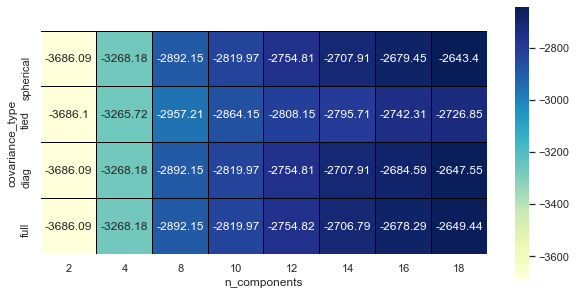

In [90]:
sns.set(rc={'figure.figsize':(10,5)})
ax = sns.heatmap(df_2.round(2).T,  
                annot = True, 
                fmt='.6g', 
                cmap= 'YlGnBu', 
                linewidths=0.1, 
                linecolor='black', 
                square=True)

plt.xlabel('n_components')
plt.ylabel('covariance_type')
i, k = ax.get_ylim()
ax.set_ylim(i+0.5, k-0.5)

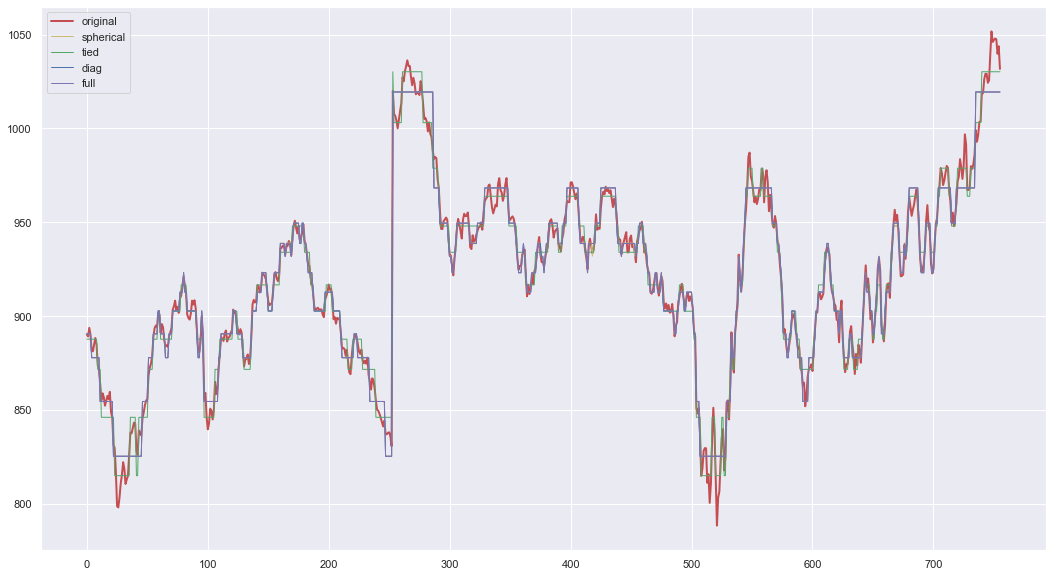

In [85]:
n_comp    = 12
colours   = ['y', 'g', 'b', 'm']

plt.figure(figsize=(18, 10))
plt.plot(values, linewidth = 2, c='r', label='original')

for col in range(4):
    model = GaussianHMM(n_components = n_comp, 
                        covariance_type=cov_type[col],  
                        n_iter=1000)             
    model.fit(values)
    labels = model.predict(values)
    means = np.zeros_like(values)
    for i in range(model.n_components):
        means[labels == i] = model.means_[i]
    plt.plot(means, linewidth = 1, c= colours[col], label=cov_type[col])
    
plt.legend(loc="best")

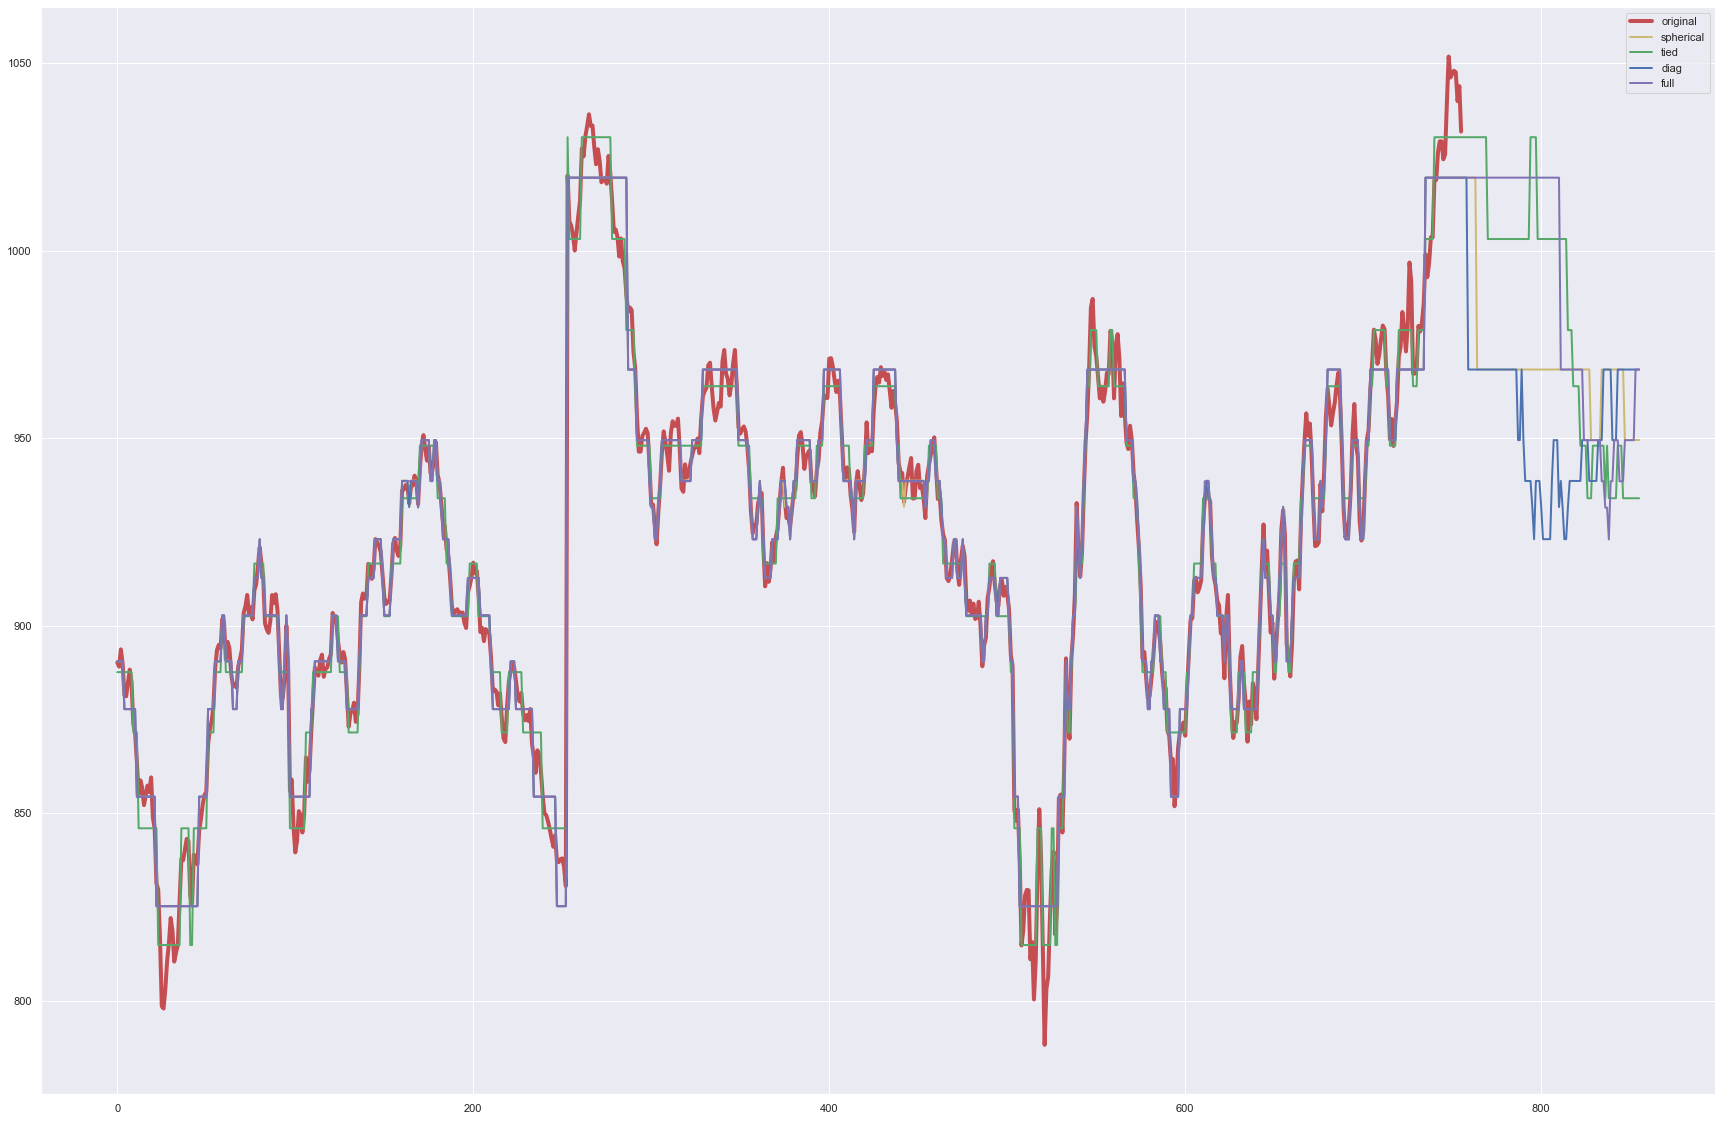

In [86]:
# Построим предсказания на 100 шагов
n = 100
plt.figure(figsize=(30, 20))
plt.plot(values, linewidth=4, c='r', label='original')


for col in range(4):
    model = GaussianHMM(n_components = n_comp, 
                        covariance_type=cov_type[col],  
                        n_iter=1000)             
    model.fit(values)
    labels = model.predict(values)
    means = np.zeros_like(values)
    for i in range(model.n_components):
        means[labels == i] = model.means_[i]
    
    prognos = means
    last_label = labels[-1]
    for i in range(n):
        last_label = np.random.choice(list(range(model.n_components)), p=model.transmat_[last_label])
        prognos = np.concatenate((prognos, model.means_[last_label].reshape(-1,1)))
    plt.plot(prognos, linewidth=2, c=colours[col], label=cov_type[col])
    
plt.legend(loc="best")